In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/jelly fish')
ds_train  = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/jelly fish',
    validation_split=0.2,
    subset="training",
    seed= 123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/jelly fish",
    validation_split = 0.2,
    subset = "validation",
    seed = 123)

Found 910 files belonging to 6 classes.
Found 910 files belonging to 6 classes.
Using 728 files for training.
Found 910 files belonging to 6 classes.
Using 182 files for validation.


In [38]:
#defining batch size

batch_size = 32

dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


In [39]:
# standardizing data for nueral network
size = (227,227)
ds_train = ds_train.map(lambda image, label : (tf.image.resize(image,size),label))
ds_val = ds_validation.map(lambda image, label : (tf.image.resize(image,size),label))

# AlexNet

In [42]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np

image_shape = (227,227,3)


#defining Model

model = Sequential()

#1st Conv layer
model.add(Conv2D(filters = 96, input_shape = image_shape, kernel_size = (11,11),strides = (4,4),padding = 'valid'))
model.add(Activation('relu'))
#max pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
#2nd Conv layer
model.add(Conv2D(filters = 256,kernel_size = (5,5),strides = (1,1),padding = 'valid'))
model.add(Activation('relu'))
#max pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
#3rd Conv layer
model.add(Conv2D(filters = 384,kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
#4th Conv layer
model.add(Conv2D(filters = 384,kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
#5th Conv layer
model.add(Conv2D(filters = 256,kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('relu'))
#max pooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

#flattening
model.add(Flatten())
#1st FCNN
model.add(Dense(4096,input_shape = (227,227,3)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#2nd FCNN
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#Output layer
model.add(Dense(6))
model.add(Activation('softmax'))


model.summary()


#compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer= 'adam',metrics=['accuracy'])


#training the model
history = model.fit(ds_train, epochs=10, validation_data=ds_val)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(ds_val)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_64 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 activation_65 (Activation)  (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 11, 11, 256)       0         
 ng2D)                                               

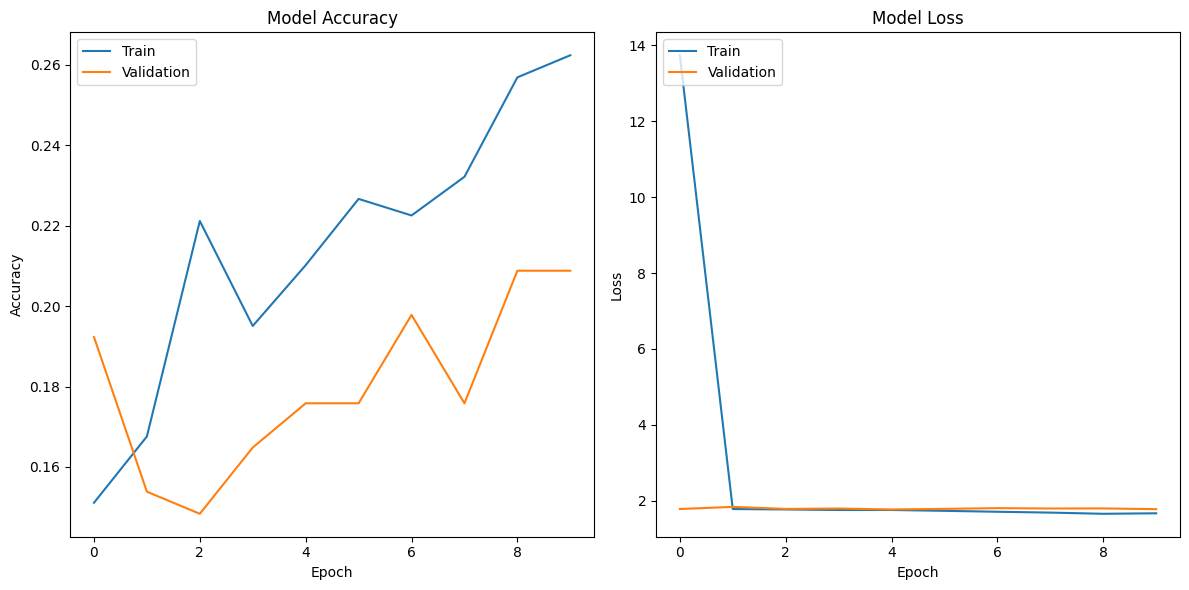

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()